In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('diabetes_patients.csv')
df

,plasma_CA19_9,LYVE1,CYFRA 21-1,Creatinine,Disease
0,16.2360,NaN,11.0354,0.659060,Diabetes
1,3.6470,0.003393,19.7934,0.128124,Diabetes
2,23.6410,0.860337,16.3842,0.882164,Diabetes
3,7.6500,1.516773,16.8321,0.755205,Diabetes
4,4.2650,0.003212,10.7719,0.425296,Diabetes
...,...,...,...,...,...
1075,10.4300,0.000129,14.5049,0.041583,Diabetes
1076,26.2300,0.091370,18.2275,0.977656,Diabetes
1077,35.2646,1.858508,16.0422,0.747632,Diabetes
1078,5.2630,4.242341,6.2110,0.311568,Diabetes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   plasma_CA19_9  1074 non-null   float64
 1   LYVE1          1066 non-null   float64
 2   CYFRA 21-1     1080 non-null   float64
 3   Creatinine     1080 non-null   float64
 4   Disease        1080 non-null   object 
dtypes: float64(4), object(1)
memory usage: 42.3+ KB


In [15]:
df.isnull().sum()

plasma_CA19_9     6
LYVE1            14
CYFRA 21-1        0
Creatinine        0
Disease           0
dtype: int64

Missing values per column before imputation:
plasma_CA19_9     6
LYVE1            14
CYFRA 21-1        0
Creatinine        0
Disease           0
dtype: int64

Missing values per column after imputation:
plasma_CA19_9    0
LYVE1            0
CYFRA 21-1       0
Creatinine       0
Disease          0
dtype: int64

Imputation completed and saved to 'imputed_patient_data.csv'.


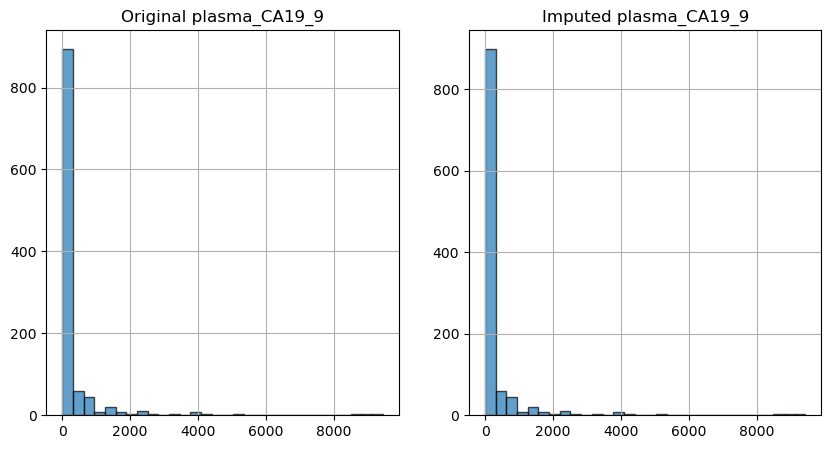

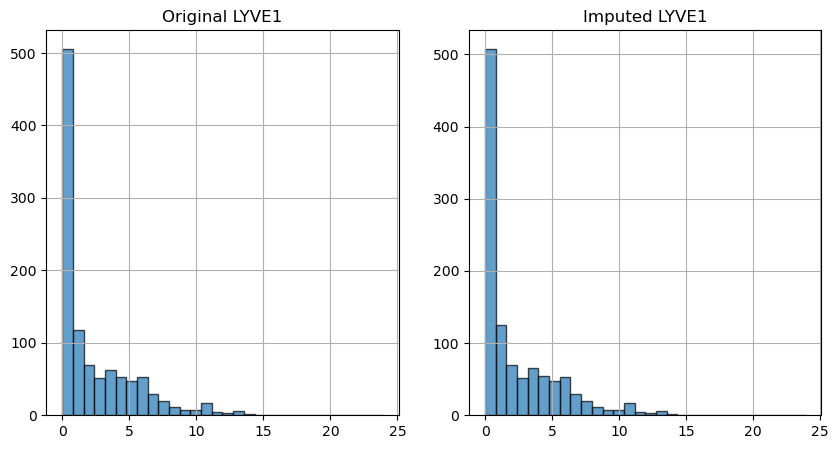

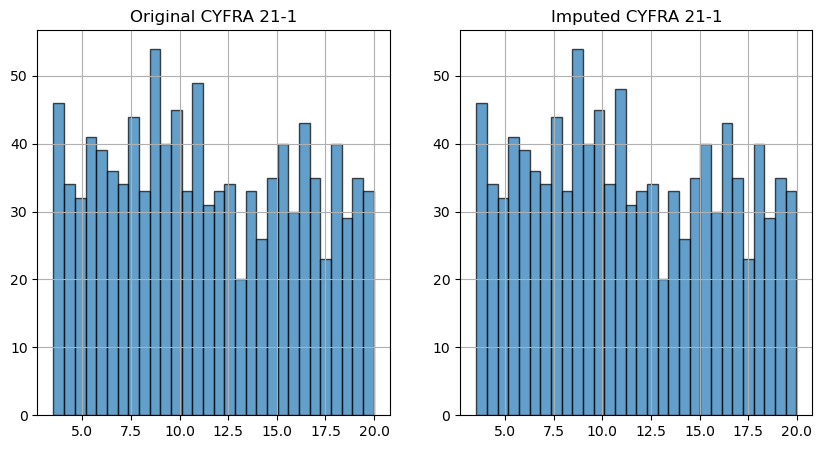

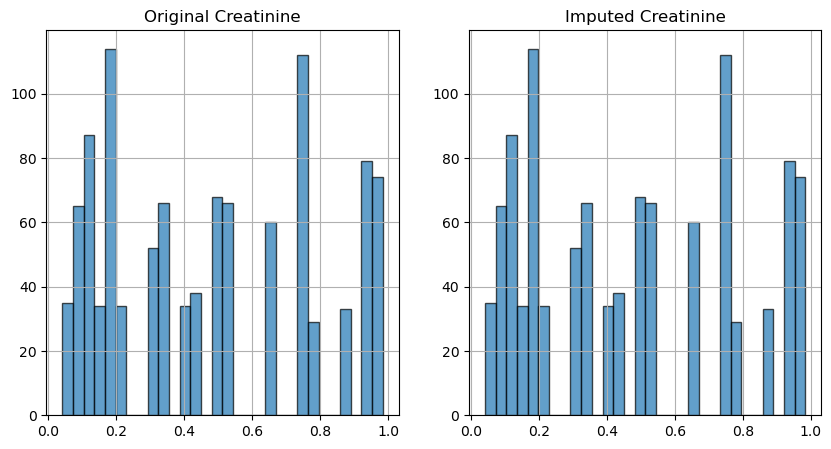

In [18]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('diabetes_patients.csv')

# Display the missing values count per column
print("Missing values per column before imputation:")
print(df.isnull().sum())

# Initialize the KNN imputer with n_neighbors = 5 (default)
imputer = KNNImputer(n_neighbors=5)

# Select the columns to be imputed (excluding the 'Disease' column if it's categorical)
columns_to_impute = ['plasma_CA19_9', 'LYVE1', 'CYFRA 21-1', 'Creatinine']
df_imputed = df.copy()
df_imputed[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Round the imputed values to 3 decimal places
df_imputed[columns_to_impute] = df_imputed[columns_to_impute].round(3)

# Display the missing values count per column after imputation
print("\nMissing values per column after imputation:")
print(df_imputed.isnull().sum())

# Save the imputed DataFrame to a new CSV file
df_imputed.to_csv('imputed_patient_data.csv', index=False)

print("\nImputation completed and saved to 'imputed_patient_data.csv'.")

# Check the distribution of values before and after imputation
for column in columns_to_impute:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    df[column].hist(bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Original {column}')

    plt.subplot(1, 2, 2)
    df_imputed[column].hist(bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Imputed {column}')

    plt.show()
